<a href="https://colab.research.google.com/github/3zero69/-/blob/main/Kaggle_%ED%95%84%EC%82%AC_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

데이터 탐색

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
len(test_labels)

10000

데이터 전처리

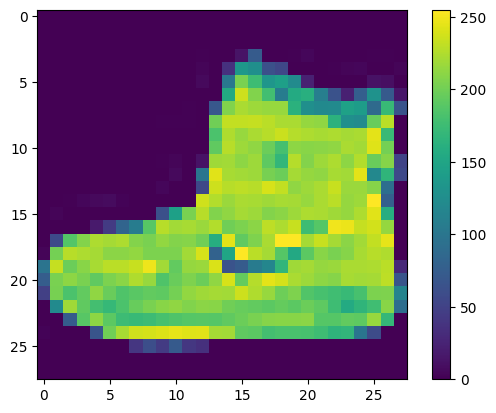

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 픽셀 값의 범위가 0~255 사

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

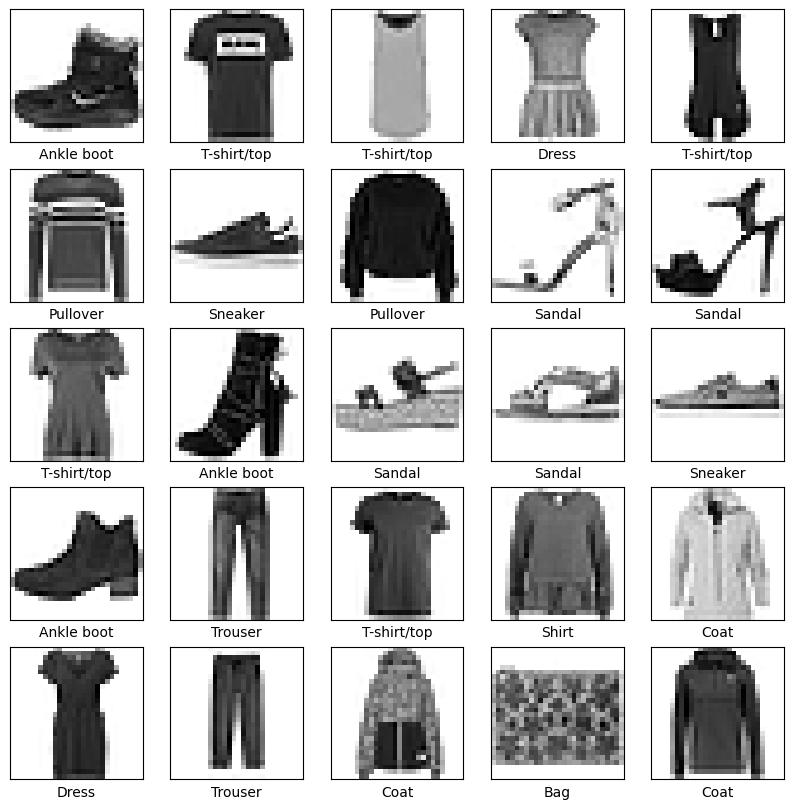

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

층 설정

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10)
])

 * 첫 번째 층인 tf.keras.layers.Flatten은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환
     - 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환

 * 픽셀을 펼친 후에는 두 개의 tf.keras.layers.Dense 층이 연속되어 연결
    - 첫 번째 Dense 층은 128개의 노드(또는 뉴런)
    - 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1

  * 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력

# 모델 컴파일

* 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
* 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
* 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련 

1. 훈련 데이터를 모델에 주입
 - 이 예에서는 train_images와 train_labels 배열
2. 모델이 이미지와 레이블을 매핑하는 방법 학습
3. 테스트 세트에 대한 모델의 예측 생성
  - 이 예에서는 test_images 배열입니다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인

## fitting

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1020 - accuracy: 0.6529
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6442 - accuracy: 0.7685
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5668 - accuracy: 0.7972
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5240 - accuracy: 0.8141
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4969 - accuracy: 0.8245
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4767 - accuracy: 0.8315
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4617 - accuracy: 0.8362
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4490 - accuracy: 0.8415
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4395 - accuracy: 0.8447
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss:

## 정확도 평가

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4592 - accuracy: 0.8344 - 662ms/epoch - 2ms/step

Test accuracy: 0.8343999981880188


> 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음
  - 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문

## 예측

훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행

소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환

In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [30]:
predictions[0]

array([7.6857725e-07, 1.8466086e-08, 6.2859071e-06, 4.6211489e-06,
       8.4903340e-06, 2.1350817e-01, 1.9665064e-05, 2.8516924e-01,
       5.7626977e-03, 4.9552009e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

> 모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신

In [32]:
test_labels[0]

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## 예측 확인

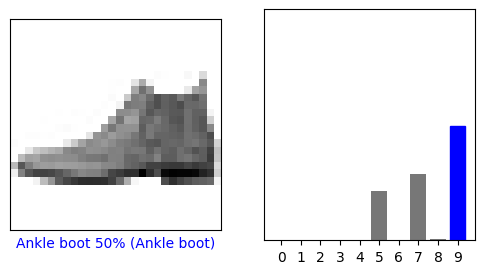

In [34]:
# 0번째 원소 이미지, 예측, 신뢰도 점수 배열
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

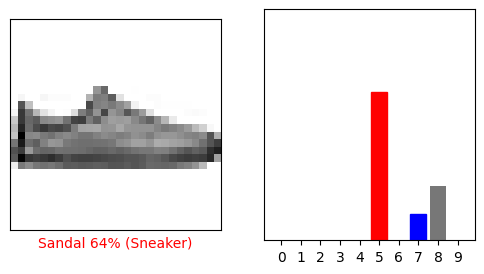

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

> 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색

> 신뢰도 점수가 높을 때도 잘못 예측할 수 있음

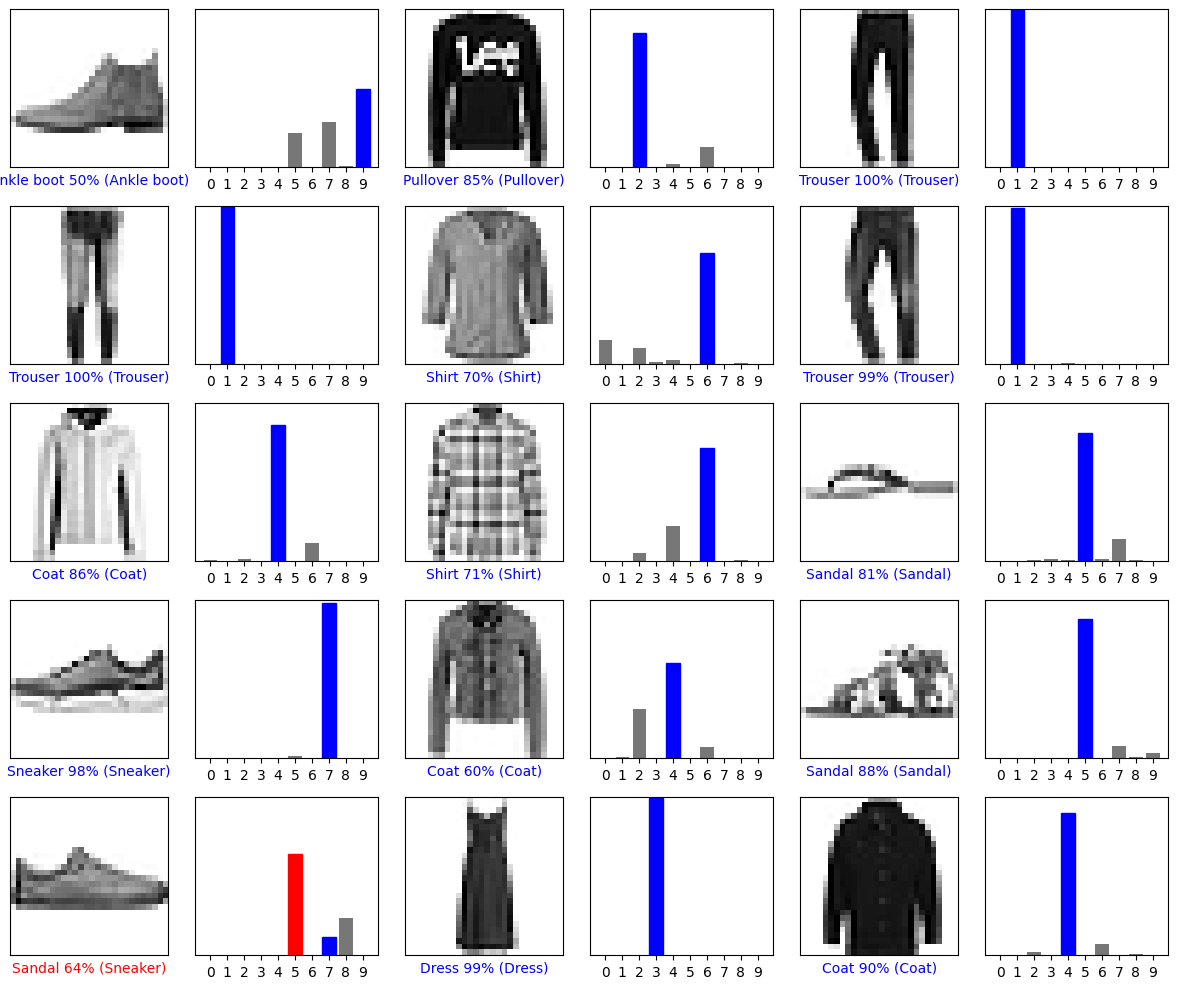

In [36]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 훈련된 모델 사용

In [37]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [38]:
# Add the image to a batch where it's the only member. - 2차원 배열로 만들어야 함
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [39]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[4.1926635e-04 6.1578426e-06 8.5044843e-01 8.0131977e-05 1.7665431e-02
  3.0872230e-10 1.3124804e-01 2.4138921e-15 1.3245642e-04 3.5064968e-11]]


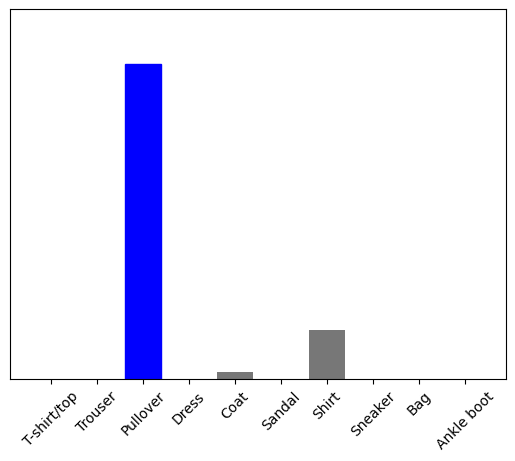

In [40]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [41]:
np.argmax(predictions_single[0])

2